In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

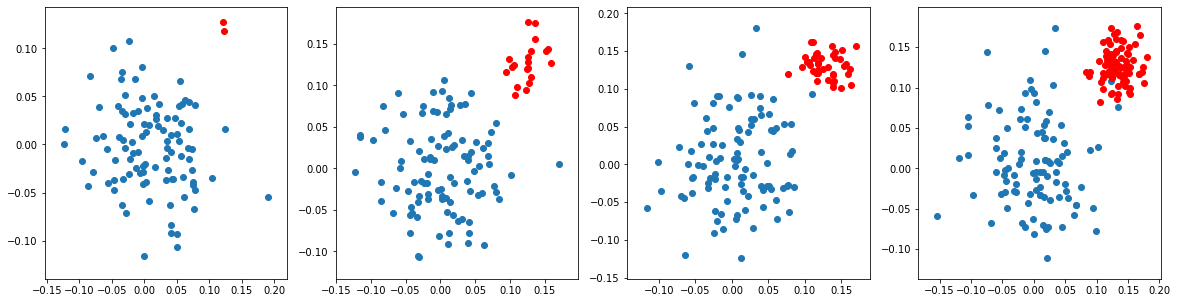

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

In [10]:
def create_grid_plot(ratios,c_value):
    print('start')
    plt.subplots_adjust(0,0,1,1.5)# Tuning the plot, left, right, bottom,top
    increment = 1
    for j,i in enumerate(ratios):
        
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        #plt.scatter(X_p[:,0],X_p[:,1])
        #plt.scatter(X_n[:,0],X_n[:,1],color='red')
        
        for j,c in enumerate(c_value):
            
            plt.subplot(len(ratios),len(c_value),increment)
            title_axes  = str(i) + str(' VS ') + str(c)
            ax = plt.gca()
            ax.set_title(title_axes)
            # fit the model, don't regularize for illustration purposes
            clf = SVC(kernel='linear', C=c).fit(X,y)
            plt.scatter(X_p[:,0],X_p[:,1])
            plt.scatter(X_n[:,0],X_n[:,1],color='red')
            draw_line(clf.coef_[0],clf.intercept_,y.min(),y.max())
            increment+=1
            
            # plot the decision function
            ax = plt.gca()
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            plt.xlim(-0.15,0.20)
            plt.ylim(-0.15,0.25)

            # create grid to evaluate model
            xx = np.linspace(xlim[0], xlim[1], 50)
            yy = np.linspace(ylim[0], ylim[1], 50)
            YY, XX = np.meshgrid(yy, xx)
            xy = np.vstack([XX.ravel(), YY.ravel()]).T
            Z = clf.decision_function(xy).reshape(XX.shape)

            # plot decision boundary and margins
            ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                       linestyles=['--', '-', '--'])
            # plot support vectors
            ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                       linewidth=1, facecolors='none', edgecolors='k')
    plt.tight_layout()
    
    plt.show()
    

start


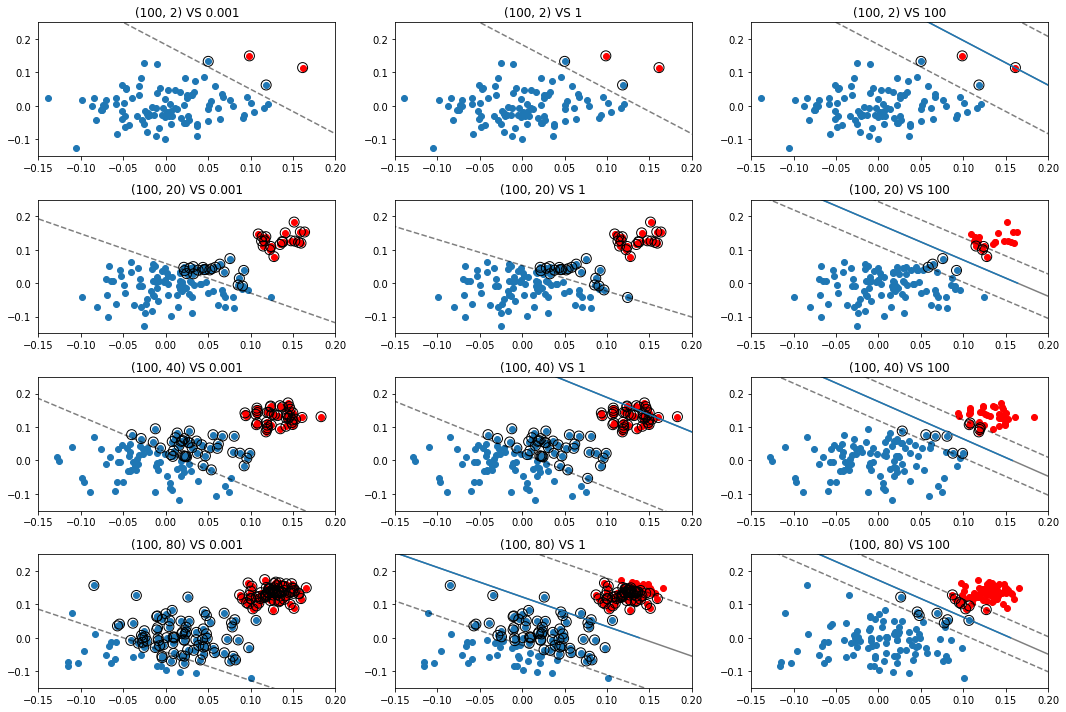

In [11]:
#plt.figure(figsize=(20,5))
fig = plt.figure(figsize=(15,10))
#plt.xlim(0, 25)
#plt.ylim(0,25)
c_value = [0.001, 1, 100]
create_grid_plot(ratios,c_value)

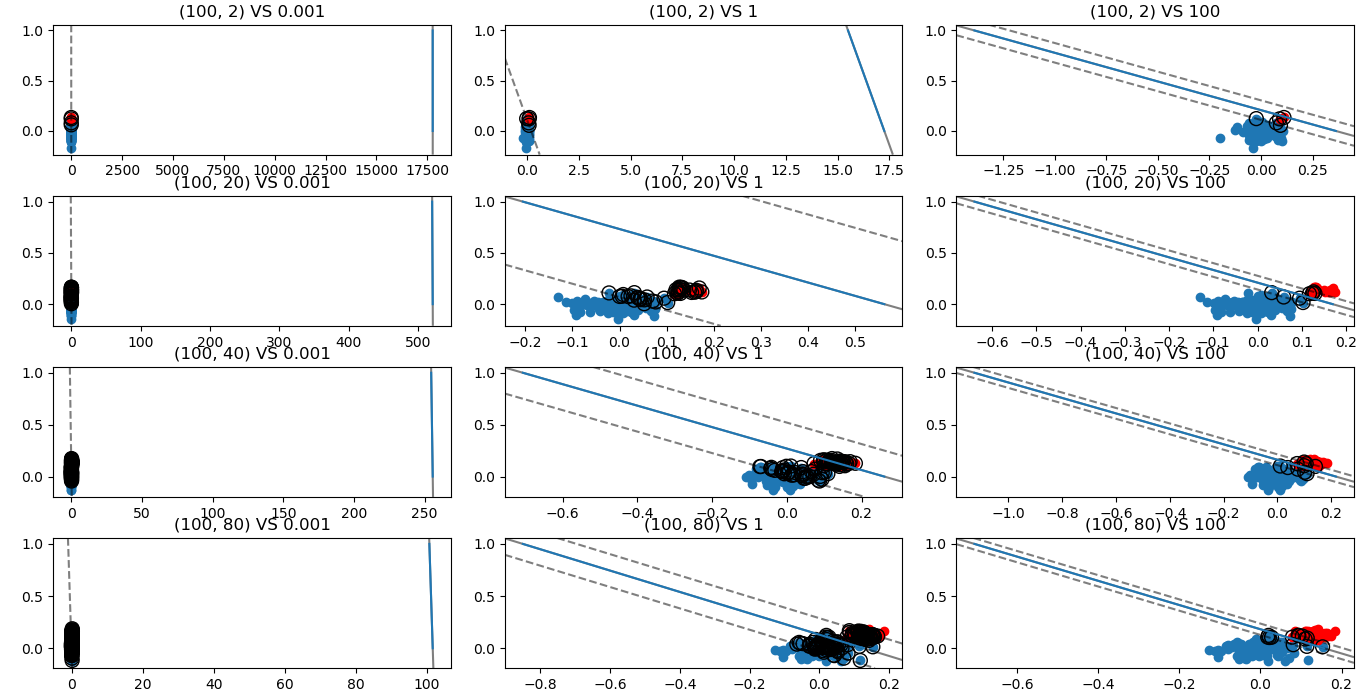

In [6]:
#same graph as above -  for explanation set the Y limit from 0 to 1
from IPython.display import Image
Image(filename=r"C:\Users\User\Pictures\Figure_2.png") 

<pre>
<font color='Blue'><b>Let’s take C_value  = 0.001</b></font>
<strong>Scenario 1 – 100:2 VS C_value = 0.001</strong>
A very small value of C caused the optimizer to look for a larger-margin separating hyperplane, the hyperplane misclassifies more points. Take away is minimum c value is highly influenced due to highly  imbalance data,
	Conclusion -  SVM not doing a proper job, which leads to misclassification. 

<strong>Scenario 2 – 100:20 VS C_value = 0.001</strong>
A very small value of C caused the optimizer to look for a larger-margin separating hyperplane, the hyperplane misclassifies more points. Take away is minimum c value is highly influenced due to data imbalance,
	Conclusion -  SVM not doing proper job, which leads to misclassification. 

<strong>Scenario 3 – 100:40 VS C_value = 0.001</strong>
A very small value of C caused the optimizer to look for a larger-margin separating hyperplane, the  hyperplane misclassifies more points. Take away is minimum c value is highly influenced due to data imbalance,
	Conclusion -  SVM not doing proper job, which leads to misclassification. 

<strong>Scenario 4 – 100:80 VS C_value = 0.001</strong>
A very small value of C caused the optimizer to look for a larger-margin separating hyperplane, the hyperplane misclassifies more points. Take away is minimum c value is highly influenced due to data imbalance,
	Conclusion -  SVM not doing proper job, which leads to misclassification. 



<font color='Blue'><b>Let’s take C_value  = 1 </b></font>
<strong>Scenario 1 – 100:2 VS C_value = 1</strong>
A very small value of C caused the optimizer to look for a larger-margin separating hyperplane, the hyperplane misclassifies more points. Take away is minimum c value is highly influenced due to highly  imbalanced data,
	Conclusion -  SVM not doing a proper job, which leads to misclassification. 

<strong>Scenario 2 – 100:20 VS C_value = 1</strong>
A very small value of C caused the optimizer to look for a larger-margin separating hyperplane, the hyperplane misclassifies more points. Take away is minimum c value is highly influenced due to data imbalance,
	Conclusion -  SVM not doing proper job, which leads to misclassification. 

<strong>Scenario 3 – 100:40 VS C_value = 1</strong>
A very small value of C caused the optimizer to look for a larger-margin separating hyperplane, the  hyperplane misclassifies less points compare to scenario 1 and scenario 2. Take away is minimum c value is highly influenced due to data imbalance but is performed well when we increasing c value,
	Conclusion -  SVM not doing proper job, which leads to misclassification


<strong>Scenario 4 – 100:80 VS C_value = 1</strong>
A very small value of C caused the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies limited points. But all the correctly labeled points lies between Margin  Take away is minimum c value is highly influenced due to data imbalance,
	Conclusion -  SVM performance improved when increasing C value.



<font color='Blue'><b>Let’s take C_value  = 100 </b></font>
<strong>Scenario 1 – 100:2 VS C_value = 1</strong>
A large value of C caused the optimizer to look for a smaller-margin separating hyperplane, the hyperplane misclassified limited points. Take away is larger c value is not  highly influenced due to highly  imbalanced data,
	Conclusion -  SVM doing great job when we increased c value
 

<strong>Scenario 2 – 100:20 VS C_value = 100</strong>
A very large value of C caused the optimizer to look for a smaller-margin separating hyperplane, the hyperplane misclassified limited points. Take away is larger c value is not  highly influenced due to highly  imbalanced data,
	Conclusion -  SVM doing great job when we increased c value

<strong>Scenario 3 – 100:40 VS C_value = 100</strong>
A large value of C caused the optimizer to look for a smaller-margin separating hyperplane, the hyperplane classified correctly , but is a kind of low bias and may leads to high variance . Take away is larger c value is not  highly influenced due to highly  imbalanced data,
	Conclusion -  SVM doing great job when we increased c value


<strong>Scenario 4 – 100:80 VS C_value = 100</strong>
A large value of C caused the optimizer to look for a smaller-margin separating hyperplane, the hyperplane classified correctly . Take away is larger c value is not  highly influenced due to highly  imbalanced data, which leads to low bias and low variances
	Conclusion -  SVM did great job.


<pre>



## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [12]:
#you can start writing code here.

def create_grid_plot_logistic(ratios,c_value):
    print('start')
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(0,0,1,1.5)
    increment = 1
    for j,i in enumerate(ratios):
        
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        #plt.scatter(X_p[:,0],X_p[:,1])
        #plt.scatter(X_n[:,0],X_n[:,1],color='red')
        
        for j,c in enumerate(c_value):
            
            plt.subplot(len(ratios),len(c_value),increment)
            title_axes  = str(i) + str(' VS ') + str(c)
            ax = plt.gca()
            ax.set_title(title_axes)
            plt.xlim(-0.15,0.20)
            plt.ylim(-0.15,0.25)
            # fit the model, don't regularize for illustration purposes
            clf = LogisticRegression(C=c).fit(X,y)
            plt.scatter(X_p[:,0],X_p[:,1])
            plt.scatter(X_n[:,0],X_n[:,1],color='red')
            draw_line(clf.coef_[0],clf.intercept_,y.min(),y.max())
            increment+=1
            

    plt.tight_layout()
    plt.show()
    

start


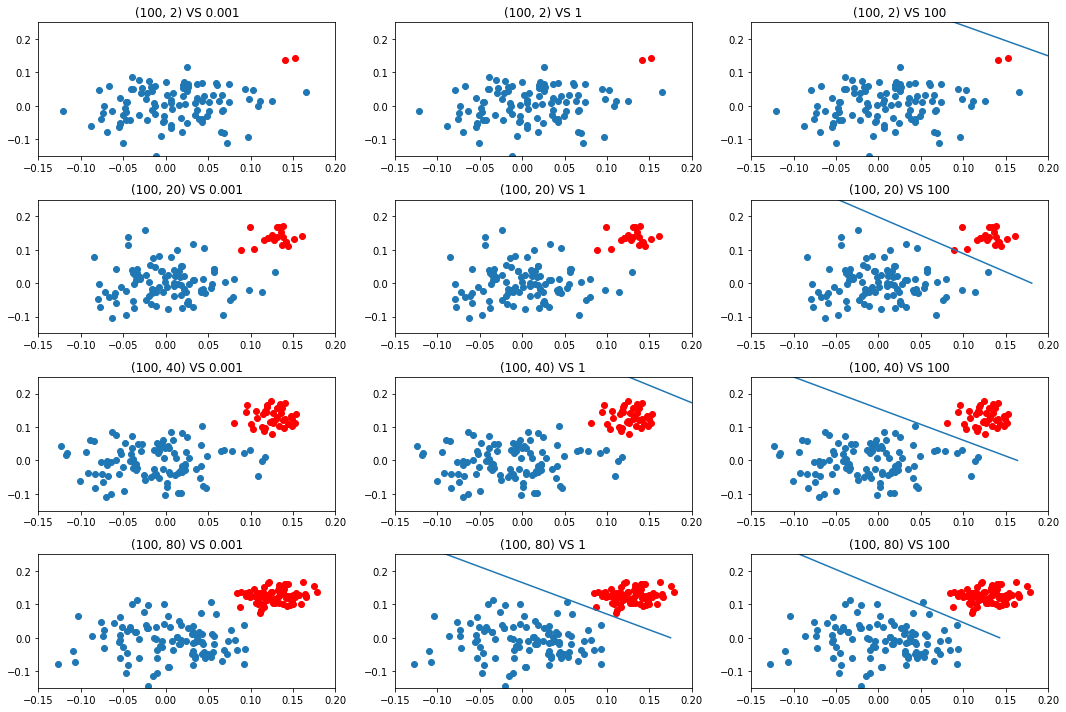

In [13]:
c_value = [0.001, 1, 100]
create_grid_plot_logistic(ratios,c_value)

<pre>
<font color='Blue'><b>Logistic Regression</b></font>
<strong>C = 0.001 </strong>
As per above results minimum c value doesn’t perform well for all three kind of Data imbalance. All fields are mis classified
<strong>C = 1 </strong>
IF we apply c =1 in logistic regression for highly imbalance dataset, doesn’t perform well, but as part of 100:80 ratio this c value performed well
<strong>C = 100 </strong>
 Higher C value suites for highly imbalance dataset but not for extremely imbalance dataset.  
<pre>